## Fusion des DataFrames usagLieux, Vehic et Caractéristiques = usag_Lieux_Vehic_Carac = fusion 3 ##############

In [1]:
# Import des packages
import pandas as pd;
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

import missingno as msno

In [2]:
# Using the categorical dtype is a great way to save memory and boost performance. Specifying the dtypes will lower the amount of memory required to load your dataset. This is quite helpful when dealing with large datasets!

# Create a dictionary with column names as keys and "category" as values
lieux_dtypes = {
  "catr":"category",
  "circ":"category",
  "prof":"category",
  "plan":"category",
  "surf":"category",
  "situ":"category"
}


In [3]:
# Read in the CSV using the dtypes parameter
lieux = pd.read_csv('lieux11.csv', parse_dates=["annee"], dtype=lieux_dtypes)
lieux.head(10)

,Unnamed: 0,num_acc,catr,circ,nbv,vosp,prof,plan,surf,infra,situ,annee
0,0,200500000001,3-Route Départementale,Bidirectionnelle(2),2.0,Sans objet(0),Plat(1),Partie rectiligne(1),Normale(1),Aucun,Sur chaussée(1),2005-01-01
1,1,200500000002,2-Route nationale,Non renseigné(-1),2.0,Piste cyclable(1),Plat(1),Partie rectiligne(1),Normale(1),Aucun,Sur piste cyclable(5),2005-01-01
2,2,200500000003,2-Route nationale,Non renseigné(-1),0.0,Piste cyclable(1),Plat(1),Partie rectiligne(1),Mouillée(2),Aucun,Sur piste cyclable(5),2005-01-01
3,3,200500000004,3-Route Départementale,Bidirectionnelle(2),2.0,Sans objet(0),Plat(1),Partie rectiligne(1),Normale(1),Aucun,Sur chaussée(1),2005-01-01
4,4,200500000005,3-Route Départementale,Bidirectionnelle(2),2.0,Sans objet(0),Plat(1),En courbe à droite(3),Mouillée(2),Aucun,Sur accotement(3),2005-01-01
5,5,200500000006,3-Route Départementale,Bidirectionnelle(2),2.0,Sans objet(0),Plat(1),En courbe à droite(3),Mouillée(2),Aucun,Sur piste cyclable(5),2005-01-01
6,6,200500000007,3-Route Départementale,Bidirectionnelle(2),0.0,Sans objet(0),Plat(1),Partie rectiligne(1),Normale(1),Aucun,Sur chaussée(1),2005-01-01
7,7,200500000008,3-Route Départementale,Bidirectionnelle(2),2.0,Sans objet(0),Plat(1),En courbe à droite(3),Normale(1),Aucun,Sur accotement(3),2005-01-01
8,8,200500000009,3-Route Départementale,Bidirectionnelle(2),2.0,Sans objet(0),Non renseigné(-1),Partie rectiligne(1),Normale(1),Aucun,Sur chaussée(1),2005-01-01
9,9,200500000010,2-Route nationale,Non renseigné(-1),2.0,Sans objet(0),Plat(1),Partie rectiligne(1),Mouillée(2),Aucun,Sur chaussée(1),2005-01-01


In [4]:
lieux.dtypes

Unnamed: 0             int64
num_acc                int64
catr                category
circ                category
nbv                  float64
vosp                  object
prof                category
plan                category
surf                category
infra                 object
situ                category
annee         datetime64[ns]
dtype: object

In [5]:
lieux.drop("Unnamed: 0", axis=1, inplace=True)

In [6]:
lieux.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1121571 entries, 0 to 1121570
Data columns (total 11 columns):
 #   Column   Non-Null Count    Dtype         
---  ------   --------------    -----         
 0   num_acc  1121571 non-null  int64         
 1   catr     1121570 non-null  category      
 2   circ     1119997 non-null  category      
 3   nbv      1118840 non-null  float64       
 4   vosp     1118810 non-null  object        
 5   prof     1119622 non-null  category      
 6   plan     1119290 non-null  category      
 7   surf     1119647 non-null  category      
 8   infra    1116163 non-null  object        
 9   situ     1116601 non-null  category      
 10  annee    1121571 non-null  datetime64[ns]
dtypes: category(6), datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 49.2+ MB


In [7]:
# Filter data between two dates
filtered_df = lieux.loc[lieux['annee'].dt.year == 2020]
# Display
display(filtered_df[['num_acc', 'annee']].head(10))
display(filtered_df.shape)

,num_acc,annee
1017309,202000000001,2020-01-01
1017310,202000000002,2020-01-01
1017311,202000000003,2020-01-01
1017312,202000000004,2020-01-01
1017313,202000000005,2020-01-01
1017314,202000000006,2020-01-01
1017315,202000000007,2020-01-01
1017316,202000000008,2020-01-01
1017317,202000000009,2020-01-01
1017318,202000000010,2020-01-01


(47744, 11)

In [8]:
# Create a dictionary with column names as keys and "category" as values
usagers_dtypes = {
    "num_acc":"int64",
    "place":"category",
    "catu":"category",
    "grav":"category",
    "sexe":"category",
    "trajet":"category",
    "locp":"category",
    "actp":"category",
    "etatp":"category",
    "secuUn":"category",
    "secuDeux":"category",
    "secuTrois":"category",
    "tranches_ages":"category",
    # 'age_acc': 'timedelta64[ns]', the dtype timedelta64[ns] is not supported for parsing
}

In [9]:
usagers = pd.read_csv('usag5.csv', dtype=usagers_dtypes, parse_dates=["annee", "an_naiss", "an_nais"], low_memory=False)
usagers.head(10)

,Unnamed: 0,num_acc,place,catu,grav,sexe,trajet,locp,actp,etatp,...,annee,id_vehicule,secuUn,secuDeux,secuTrois,an_naiss,age_acc,age_acc_seconds,age_acc_an,tranches_ages
0,0,200500000001,1.0,Conducteur,Blessé léger,Masculin,Domicile – travail,Sans objet,Non renseigné ou sans objet,Non renseigné,...,2005-01-01,NaN,Ceinture,Ceinture,NaN,1976-01-01,10593 days,9.152352e+08,29.021918,23-31
1,1,200500000001,1.0,Conducteur,Blessé hospitalisé,Féminin,Courses – achats,Sans objet,Non renseigné ou sans objet,Non renseigné,...,2005-01-01,NaN,Ceinture,Ceinture,NaN,1968-01-01,13515 days,1.167696e+09,37.027397,32-40
2,2,200500000001,2.0,Passager,Indemne,Masculin,Non renseigné,Sans objet,Non renseigné ou sans objet,Non renseigné,...,2005-01-01,NaN,Ceinture,Ceinture,NaN,1964-01-01,14976 days,1.293926e+09,41.030137,41-50
3,3,200500000001,4.0,Passager,Indemne,Masculin,Non renseigné,Sans objet,Non renseigné ou sans objet,Non renseigné,...,2005-01-01,NaN,Dispositif enfants,Ceinture,NaN,2004-01-01,366 days,3.162240e+07,1.002740,0-11
4,4,200500000001,5.0,Passager,Indemne,Masculin,Non renseigné,Sans objet,Non renseigné ou sans objet,Non renseigné,...,2005-01-01,NaN,Ceinture,Ceinture,NaN,1998-01-01,2557 days,2.209248e+08,7.005479,0-11
5,5,200500000001,3.0,Passager,Indemne,Féminin,Non renseigné,Sans objet,Non renseigné ou sans objet,Non renseigné,...,2005-01-01,NaN,Ceinture,Ceinture,NaN,1991-01-01,5114 days,4.418496e+08,14.010959,12-22
6,6,200500000002,1.0,Conducteur,Indemne,Masculin,Promenade – loisirs,Sans objet,Non renseigné ou sans objet,Non renseigné,...,2005-01-01,NaN,Ceinture,Ceinture,NaN,1955-01-01,18263 days,1.577923e+09,50.035616,50+
7,7,200500000002,1.0,Conducteur,Blessé hospitalisé,Masculin,Promenade – loisirs,Sans objet,Non renseigné ou sans objet,Non renseigné,...,2005-01-01,NaN,Casque,Ceinture,NaN,1979-01-01,9497 days,8.205408e+08,26.019178,23-31
8,8,200500000003,1.0,Conducteur,Indemne,Masculin,Domicile – travail,Sans objet,Non renseigné ou sans objet,Non renseigné,...,2005-01-01,NaN,Casque,Ceinture,NaN,1983-01-01,8036 days,6.943104e+08,22.016438,12-22
9,9,200500000003,1.0,Conducteur,Blessé hospitalisé,Masculin,Domicile – travail,Sans objet,Non renseigné ou sans objet,Non renseigné,...,2005-01-01,NaN,Casque,Ceinture,NaN,1956-01-01,17898 days,1.546387e+09,49.035616,41-50


In [10]:
usagers.drop("Unnamed: 0", axis=1, inplace=True)

In [11]:
usagers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2498897 entries, 0 to 2498896
Data columns (total 21 columns):
 #   Column           Dtype         
---  ------           -----         
 0   num_acc          int64         
 1   place            category      
 2   catu             category      
 3   grav             category      
 4   sexe             category      
 5   trajet           category      
 6   locp             category      
 7   actp             category      
 8   etatp            category      
 9   an_nais          datetime64[ns]
 10  num_veh          object        
 11  annee            datetime64[ns]
 12  id_vehicule      object        
 13  secuUn           category      
 14  secuDeux         category      
 15  secuTrois        category      
 16  an_naiss         datetime64[ns]
 17  age_acc          object        
 18  age_acc_seconds  float64       
 19  age_acc_an       float64       
 20  tranches_ages    category      
dtypes: category(12), datetime64[ns]

In [12]:
usagers.head(10)

,num_acc,place,catu,grav,sexe,trajet,locp,actp,etatp,an_nais,...,annee,id_vehicule,secuUn,secuDeux,secuTrois,an_naiss,age_acc,age_acc_seconds,age_acc_an,tranches_ages
0,200500000001,1.0,Conducteur,Blessé léger,Masculin,Domicile – travail,Sans objet,Non renseigné ou sans objet,Non renseigné,1976-01-01,...,2005-01-01,NaN,Ceinture,Ceinture,NaN,1976-01-01,10593 days,9.152352e+08,29.021918,23-31
1,200500000001,1.0,Conducteur,Blessé hospitalisé,Féminin,Courses – achats,Sans objet,Non renseigné ou sans objet,Non renseigné,1968-01-01,...,2005-01-01,NaN,Ceinture,Ceinture,NaN,1968-01-01,13515 days,1.167696e+09,37.027397,32-40
2,200500000001,2.0,Passager,Indemne,Masculin,Non renseigné,Sans objet,Non renseigné ou sans objet,Non renseigné,1964-01-01,...,2005-01-01,NaN,Ceinture,Ceinture,NaN,1964-01-01,14976 days,1.293926e+09,41.030137,41-50
3,200500000001,4.0,Passager,Indemne,Masculin,Non renseigné,Sans objet,Non renseigné ou sans objet,Non renseigné,2004-01-01,...,2005-01-01,NaN,Dispositif enfants,Ceinture,NaN,2004-01-01,366 days,3.162240e+07,1.002740,0-11
4,200500000001,5.0,Passager,Indemne,Masculin,Non renseigné,Sans objet,Non renseigné ou sans objet,Non renseigné,1998-01-01,...,2005-01-01,NaN,Ceinture,Ceinture,NaN,1998-01-01,2557 days,2.209248e+08,7.005479,0-11
5,200500000001,3.0,Passager,Indemne,Féminin,Non renseigné,Sans objet,Non renseigné ou sans objet,Non renseigné,1991-01-01,...,2005-01-01,NaN,Ceinture,Ceinture,NaN,1991-01-01,5114 days,4.418496e+08,14.010959,12-22
6,200500000002,1.0,Conducteur,Indemne,Masculin,Promenade – loisirs,Sans objet,Non renseigné ou sans objet,Non renseigné,1955-01-01,...,2005-01-01,NaN,Ceinture,Ceinture,NaN,1955-01-01,18263 days,1.577923e+09,50.035616,50+
7,200500000002,1.0,Conducteur,Blessé hospitalisé,Masculin,Promenade – loisirs,Sans objet,Non renseigné ou sans objet,Non renseigné,1979-01-01,...,2005-01-01,NaN,Casque,Ceinture,NaN,1979-01-01,9497 days,8.205408e+08,26.019178,23-31
8,200500000003,1.0,Conducteur,Indemne,Masculin,Domicile – travail,Sans objet,Non renseigné ou sans objet,Non renseigné,1983-01-01,...,2005-01-01,NaN,Casque,Ceinture,NaN,1983-01-01,8036 days,6.943104e+08,22.016438,12-22
9,200500000003,1.0,Conducteur,Blessé hospitalisé,Masculin,Domicile – travail,Sans objet,Non renseigné ou sans objet,Non renseigné,1956-01-01,...,2005-01-01,NaN,Casque,Ceinture,NaN,1956-01-01,17898 days,1.546387e+09,49.035616,41-50


In [13]:
# Filter data between two dates
filtered_df = usagers.loc[usagers['annee'].dt.year == 2020]
# Display
display(filtered_df[['num_acc', 'annee']].head(10))
display(filtered_df.shape)

,num_acc,annee
2393943,202000000001,2020-01-01
2393944,202000000001,2020-01-01
2393945,202000000002,2020-01-01
2393946,202000000002,2020-01-01
2393947,202000000003,2020-01-01
2393948,202000000003,2020-01-01
2393949,202000000003,2020-01-01
2393950,202000000004,2020-01-01
2393951,202000000004,2020-01-01
2393952,202000000005,2020-01-01


(104954, 21)

In [14]:
filtered_df.num_acc.unique()

array([202000000001, 202000000002, 202000000003, ..., 202000047742,
       202000047743, 202000047744])

In [15]:
usagLieux = usagers.merge(lieux, how='inner', on=['num_acc', 'annee'])
usagLieux.head()

,num_acc,place,catu,grav,sexe,trajet,locp,actp,etatp,an_nais,...,tranches_ages,catr,circ,nbv,vosp,prof,plan,surf,infra,situ
0,200500000001,1.0,Conducteur,Blessé léger,Masculin,Domicile – travail,Sans objet,Non renseigné ou sans objet,Non renseigné,1976-01-01,...,23-31,3-Route Départementale,Bidirectionnelle(2),2.0,Sans objet(0),Plat(1),Partie rectiligne(1),Normale(1),Aucun,Sur chaussée(1)
1,200500000001,1.0,Conducteur,Blessé hospitalisé,Féminin,Courses – achats,Sans objet,Non renseigné ou sans objet,Non renseigné,1968-01-01,...,32-40,3-Route Départementale,Bidirectionnelle(2),2.0,Sans objet(0),Plat(1),Partie rectiligne(1),Normale(1),Aucun,Sur chaussée(1)
2,200500000001,2.0,Passager,Indemne,Masculin,Non renseigné,Sans objet,Non renseigné ou sans objet,Non renseigné,1964-01-01,...,41-50,3-Route Départementale,Bidirectionnelle(2),2.0,Sans objet(0),Plat(1),Partie rectiligne(1),Normale(1),Aucun,Sur chaussée(1)
3,200500000001,4.0,Passager,Indemne,Masculin,Non renseigné,Sans objet,Non renseigné ou sans objet,Non renseigné,2004-01-01,...,0-11,3-Route Départementale,Bidirectionnelle(2),2.0,Sans objet(0),Plat(1),Partie rectiligne(1),Normale(1),Aucun,Sur chaussée(1)
4,200500000001,5.0,Passager,Indemne,Masculin,Non renseigné,Sans objet,Non renseigné ou sans objet,Non renseigné,1998-01-01,...,0-11,3-Route Départementale,Bidirectionnelle(2),2.0,Sans objet(0),Plat(1),Partie rectiligne(1),Normale(1),Aucun,Sur chaussée(1)


In [16]:
usagLieux.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2297728 entries, 0 to 2297727
Data columns (total 30 columns):
 #   Column           Dtype         
---  ------           -----         
 0   num_acc          int64         
 1   place            category      
 2   catu             category      
 3   grav             category      
 4   sexe             category      
 5   trajet           category      
 6   locp             category      
 7   actp             category      
 8   etatp            category      
 9   an_nais          datetime64[ns]
 10  num_veh          object        
 11  annee            datetime64[ns]
 12  id_vehicule      object        
 13  secuUn           category      
 14  secuDeux         category      
 15  secuTrois        category      
 16  an_naiss         datetime64[ns]
 17  age_acc          object        
 18  age_acc_seconds  float64       
 19  age_acc_an       float64       
 20  tranches_ages    category      
 21  catr             category      

In [17]:
usagLieux['annee'].unique()

array(['2005-01-01T00:00:00.000000000', '2006-01-01T00:00:00.000000000',
       '2007-01-01T00:00:00.000000000', '2008-01-01T00:00:00.000000000',
       '2009-01-01T00:00:00.000000000', '2010-01-01T00:00:00.000000000',
       '2011-01-01T00:00:00.000000000', '2012-01-01T00:00:00.000000000',
       '2013-01-01T00:00:00.000000000', '2014-01-01T00:00:00.000000000',
       '2015-01-01T00:00:00.000000000', '2016-01-01T00:00:00.000000000',
       '2017-01-01T00:00:00.000000000', '2018-01-01T00:00:00.000000000',
       '2019-01-01T00:00:00.000000000', '2021-01-01T00:00:00.000000000',
       '2020-01-01T00:00:00.000000000'], dtype='datetime64[ns]')

In [18]:
# Filter data between two dates
filtered_df = usagLieux.loc[usagLieux['annee'].dt.year == 2020]
# Display
filtered_df.head()

,num_acc,place,catu,grav,sexe,trajet,locp,actp,etatp,an_nais,...,tranches_ages,catr,circ,nbv,vosp,prof,plan,surf,infra,situ
2192774,202000000001,1.0,Conducteur,Indemne,Masculin,Promenade – loisirs,Non renseigné,Non renseigné,Non renseigné,1983-01-01,...,32-40,4-Voie Communales,Bidirectionnelle(2),2.0,Sans objet(0),Plat(1),Partie rectiligne(1),Normale(1),Aucun,Sur chaussée(1)
2192775,202000000001,1.0,Conducteur,Blessé hospitalisé,Masculin,Promenade – loisirs,Non renseigné,Non renseigné,Non renseigné,1982-01-01,...,32-40,4-Voie Communales,Bidirectionnelle(2),2.0,Sans objet(0),Plat(1),Partie rectiligne(1),Normale(1),Aucun,Sur chaussée(1)
2192776,202000000002,1.0,Conducteur,Indemne,Masculin,Domicile – travail,Non renseigné,Non renseigné,Non renseigné,1997-01-01,...,12-22,4-Voie Communales,Bidirectionnelle(2),2.0,Sans objet(0),Plat(1),En courbe à droite(3),Normale(1),Aucun,Sur chaussée(1)
2192777,202000000002,10.0,Piéton,Blessé léger,Masculin,Promenade – loisirs,Sur passage piéton-Sans signalisation lumineuse,Traversant,Seul,1967-01-01,...,50+,4-Voie Communales,Bidirectionnelle(2),2.0,Sans objet(0),Plat(1),En courbe à droite(3),Normale(1),Aucun,Sur chaussée(1)
2192778,202000000003,1.0,Conducteur,Indemne,Masculin,Non renseigné,Non renseigné,Non renseigné,Non renseigné,1985-01-01,...,32-40,4-Voie Communales,Non renseigné(-1),2.0,Sans objet(0),Plat(1),Partie rectiligne(1),Normale(1),Aucun,Sur chaussée(1)


In [19]:
# Create a dictionary with column names as keys and "category" as values
vehicule_dtypes = {
    "num_acc":"int64",
    "senc":"category",
    "obs":"category",
    "obsm":"category",
    "choc":"category",
    "manv":"category",
    "motor":"category",
    "catv_Label":"category",
    "permis":"category"
}

In [20]:
Vehic = pd.read_csv('vehicule_pour_fusion.csv', dtype=vehicule_dtypes, parse_dates=["annee"], low_memory=False)

In [21]:
Vehic.head()

,num_acc,senc,occutc,obs,obsm,choc,manv,num_veh,annee,id_vehicule,motor,catv_Label
0,200500000001,Inconnu,0.0,Sans objet,Véhicule,Avant,Sans changement de direction,A01,2005-01-01,NaN,NaN,Voitures légères (VL) seule
1,200500000001,Inconnu,0.0,Sans objet,Véhicule,Côté gauche,En faisant demi-tour sur la chaussée,B02,2005-01-01,NaN,NaN,Voitures légères (VL) seule
2,200500000002,Inconnu,0.0,Sans objet,Véhicule,Côté droit,Tournant - A droite,A01,2005-01-01,NaN,NaN,Voitures légères (VL) seule
3,200500000002,Inconnu,0.0,Sans objet,Véhicule,Avant,Sans changement de direction,B02,2005-01-01,NaN,NaN,Deux ou trois roues de petite cylindrée (<= 50...
4,200500000003,Inconnu,0.0,Sans objet,Véhicule,Avant,Sans changement de direction,A01,2005-01-01,NaN,NaN,Deux ou trois roues de petite cylindrée (<= 50...


In [22]:
Vehic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1914902 entries, 0 to 1914901
Data columns (total 12 columns):
 #   Column       Dtype         
---  ------       -----         
 0   num_acc      int64         
 1   senc         category      
 2   occutc       float64       
 3   obs          category      
 4   obsm         category      
 5   choc         category      
 6   manv         category      
 7   num_veh      object        
 8   annee        datetime64[ns]
 9   id_vehicule  object        
 10  motor        category      
 11  catv_Label   category      
dtypes: category(7), datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 85.8+ MB


In [23]:
# Filter data between two dates
filtered_df = Vehic.loc[Vehic['annee'].dt.year == 2020]
# Display
display(filtered_df[['num_acc', 'annee']].head(10))
display(filtered_df.shape)

,num_acc,annee
1736521,202000000001,2020-01-01
1736522,202000000001,2020-01-01
1736523,202000000002,2020-01-01
1736524,202000000003,2020-01-01
1736525,202000000003,2020-01-01
1736526,202000000004,2020-01-01
1736527,202000000005,2020-01-01
1736528,202000000005,2020-01-01
1736529,202000000006,2020-01-01
1736530,202000000006,2020-01-01


(81066, 12)

In [24]:
usag_Lieux_Vehic = usagLieux.merge(Vehic, how='inner', on=['num_acc', 'annee', 'id_vehicule', 'num_veh'])
usag_Lieux_Vehic.head(10)

,num_acc,place,catu,grav,sexe,trajet,locp,actp,etatp,an_nais,...,infra,situ,senc,occutc,obs,obsm,choc,manv,motor,catv_Label
0,200500000001,1.0,Conducteur,Blessé léger,Masculin,Domicile – travail,Sans objet,Non renseigné ou sans objet,Non renseigné,1976-01-01,...,Aucun,Sur chaussée(1),Inconnu,0.0,Sans objet,Véhicule,Avant,Sans changement de direction,NaN,Voitures légères (VL) seule
1,200500000001,1.0,Conducteur,Blessé hospitalisé,Féminin,Courses – achats,Sans objet,Non renseigné ou sans objet,Non renseigné,1968-01-01,...,Aucun,Sur chaussée(1),Inconnu,0.0,Sans objet,Véhicule,Côté gauche,En faisant demi-tour sur la chaussée,NaN,Voitures légères (VL) seule
2,200500000001,2.0,Passager,Indemne,Masculin,Non renseigné,Sans objet,Non renseigné ou sans objet,Non renseigné,1964-01-01,...,Aucun,Sur chaussée(1),Inconnu,0.0,Sans objet,Véhicule,Côté gauche,En faisant demi-tour sur la chaussée,NaN,Voitures légères (VL) seule
3,200500000001,4.0,Passager,Indemne,Masculin,Non renseigné,Sans objet,Non renseigné ou sans objet,Non renseigné,2004-01-01,...,Aucun,Sur chaussée(1),Inconnu,0.0,Sans objet,Véhicule,Côté gauche,En faisant demi-tour sur la chaussée,NaN,Voitures légères (VL) seule
4,200500000001,5.0,Passager,Indemne,Masculin,Non renseigné,Sans objet,Non renseigné ou sans objet,Non renseigné,1998-01-01,...,Aucun,Sur chaussée(1),Inconnu,0.0,Sans objet,Véhicule,Côté gauche,En faisant demi-tour sur la chaussée,NaN,Voitures légères (VL) seule
5,200500000001,3.0,Passager,Indemne,Féminin,Non renseigné,Sans objet,Non renseigné ou sans objet,Non renseigné,1991-01-01,...,Aucun,Sur chaussée(1),Inconnu,0.0,Sans objet,Véhicule,Côté gauche,En faisant demi-tour sur la chaussée,NaN,Voitures légères (VL) seule
6,200500000002,1.0,Conducteur,Indemne,Masculin,Promenade – loisirs,Sans objet,Non renseigné ou sans objet,Non renseigné,1955-01-01,...,Aucun,Sur piste cyclable(5),Inconnu,0.0,Sans objet,Véhicule,Côté droit,Tournant - A droite,NaN,Voitures légères (VL) seule
7,200500000002,1.0,Conducteur,Blessé hospitalisé,Masculin,Promenade – loisirs,Sans objet,Non renseigné ou sans objet,Non renseigné,1979-01-01,...,Aucun,Sur piste cyclable(5),Inconnu,0.0,Sans objet,Véhicule,Avant,Sans changement de direction,NaN,Deux ou trois roues de petite cylindrée (<= 50...
8,200500000003,1.0,Conducteur,Indemne,Masculin,Domicile – travail,Sans objet,Non renseigné ou sans objet,Non renseigné,1983-01-01,...,Aucun,Sur piste cyclable(5),Inconnu,0.0,Sans objet,Véhicule,Avant,Sans changement de direction,NaN,Deux ou trois roues de petite cylindrée (<= 50...
9,200500000003,1.0,Conducteur,Blessé hospitalisé,Masculin,Domicile – travail,Sans objet,Non renseigné ou sans objet,Non renseigné,1956-01-01,...,Aucun,Sur piste cyclable(5),Inconnu,0.0,Sans objet,Véhicule,Avant,Sans changement de direction,NaN,Deux ou trois roues de petite cylindrée (<= 50...


In [25]:
usag_Lieux_Vehic.dtypes

num_acc                     int64
place                    category
catu                     category
grav                     category
sexe                     category
trajet                   category
locp                     category
actp                     category
etatp                    category
an_nais            datetime64[ns]
num_veh                    object
annee              datetime64[ns]
id_vehicule                object
secuUn                   category
secuDeux                 category
secuTrois                category
an_naiss           datetime64[ns]
age_acc                    object
age_acc_seconds           float64
age_acc_an                float64
tranches_ages            category
catr                     category
circ                     category
nbv                       float64
vosp                       object
prof                     category
plan                     category
surf                     category
infra                      object
situ          

In [26]:
# Create a dictionary with column names as keys and "category" as values
carac_dtypes = {
    "num_acc":"int64",
    "lum":"category",
    "agg":"category",
    "int":"category",
    "atm":"category",
    "col":"category",
    "jour_de_la_semaine":"category",
    "lat2":"float64",
    "long2":"float64",
    "mois":"object",
    "jour":"object"
}

In [27]:
Carac = pd.read_csv('carac2.csv', dtype=carac_dtypes, parse_dates=["annee", "date"], low_memory=False)

In [28]:
Carac.head()

,Unnamed: 0,num_acc,mois,jour,lum,agg,int,atm,col,com,adr,gps,dep,annee,date,jour_de_la_semaine,heure,lat2,long2
0,0,200500000001,01,12,Nuit sans éclairage public,En agglomération,Hors intersection,Normale,Deux véhicules – par le coté,11,CD41B,M,59,2005-01-01,2005-01-12,Mercredi,19,NaN,294400.0
1,1,200500000002,01,21,Plein jour,En agglomération,Hors intersection,Normale,Deux véhicules - frontale,51,rue de Lille,M,59,2005-01-01,2005-01-21,Vendredi,16,NaN,280200.0
2,2,200500000003,01,21,Nuit sans éclairage public,Hors agglomération,Hors intersection,Pluie légère,Deux véhicules - frontale,51,NaN,M,59,2005-01-01,2005-01-21,Vendredi,18,NaN,280000.0
3,3,200500000004,01,04,Plein jour,Hors agglomération,Hors intersection,Normale,Trois véhicules et plus - collisions multiples,82,NaN,M,59,2005-01-01,2005-01-04,Mardi,16,NaN,240800.0
4,4,200500000005,01,10,Nuit sans éclairage public,Hors agglomération,Hors intersection,Pluie forte,Autre collision,478,NaN,M,59,2005-01-01,2005-01-10,Lundi,19,NaN,247500.0


In [29]:
Carac.drop("Unnamed: 0", axis=1, inplace=True)

In [30]:
Carac.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1121571 entries, 0 to 1121570
Data columns (total 18 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   num_acc             1121571 non-null  int64         
 1   mois                1121571 non-null  object        
 2   jour                1121571 non-null  object        
 3   lum                 1121566 non-null  category      
 4   agg                 1121571 non-null  category      
 5   int                 1121464 non-null  category      
 6   atm                 1121498 non-null  category      
 7   col                 1121552 non-null  category      
 8   com                 1121569 non-null  object        
 9   adr                 978295 non-null   object        
 10  gps                 643154 non-null   object        
 11  dep                 1121571 non-null  object        
 12  annee               1121571 non-null  datetime64[ns]
 13  date        

In [31]:
Carac.shape

(1121571, 18)

In [32]:
# Filter data between two dates
filtered_df = Carac.loc[Carac['annee'].dt.year == 2020]
# Display
display(filtered_df[['num_acc', 'annee']].head(10))
display(filtered_df.shape)

,num_acc,annee
1017309,202000000001,2020-01-01
1017310,202000000002,2020-01-01
1017311,202000000003,2020-01-01
1017312,202000000004,2020-01-01
1017313,202000000005,2020-01-01
1017314,202000000006,2020-01-01
1017315,202000000007,2020-01-01
1017316,202000000008,2020-01-01
1017317,202000000009,2020-01-01
1017318,202000000010,2020-01-01


(47744, 18)

In [33]:
usag_Lieux_Vehic_Carac = usag_Lieux_Vehic.merge(Carac, how='inner', on=['num_acc', 'annee'])
usag_Lieux_Vehic_Carac.head(10)

,num_acc,place,catu,grav,sexe,trajet,locp,actp,etatp,an_nais,...,col,com,adr,gps,dep,date,jour_de_la_semaine,heure,lat2,long2
0,200500000001,1.0,Conducteur,Blessé léger,Masculin,Domicile – travail,Sans objet,Non renseigné ou sans objet,Non renseigné,1976-01-01,...,Deux véhicules – par le coté,11,CD41B,M,59,2005-01-12,Mercredi,19,NaN,294400.0
1,200500000001,1.0,Conducteur,Blessé hospitalisé,Féminin,Courses – achats,Sans objet,Non renseigné ou sans objet,Non renseigné,1968-01-01,...,Deux véhicules – par le coté,11,CD41B,M,59,2005-01-12,Mercredi,19,NaN,294400.0
2,200500000001,2.0,Passager,Indemne,Masculin,Non renseigné,Sans objet,Non renseigné ou sans objet,Non renseigné,1964-01-01,...,Deux véhicules – par le coté,11,CD41B,M,59,2005-01-12,Mercredi,19,NaN,294400.0
3,200500000001,4.0,Passager,Indemne,Masculin,Non renseigné,Sans objet,Non renseigné ou sans objet,Non renseigné,2004-01-01,...,Deux véhicules – par le coté,11,CD41B,M,59,2005-01-12,Mercredi,19,NaN,294400.0
4,200500000001,5.0,Passager,Indemne,Masculin,Non renseigné,Sans objet,Non renseigné ou sans objet,Non renseigné,1998-01-01,...,Deux véhicules – par le coté,11,CD41B,M,59,2005-01-12,Mercredi,19,NaN,294400.0
5,200500000001,3.0,Passager,Indemne,Féminin,Non renseigné,Sans objet,Non renseigné ou sans objet,Non renseigné,1991-01-01,...,Deux véhicules – par le coté,11,CD41B,M,59,2005-01-12,Mercredi,19,NaN,294400.0
6,200500000002,1.0,Conducteur,Indemne,Masculin,Promenade – loisirs,Sans objet,Non renseigné ou sans objet,Non renseigné,1955-01-01,...,Deux véhicules - frontale,51,rue de Lille,M,59,2005-01-21,Vendredi,16,NaN,280200.0
7,200500000002,1.0,Conducteur,Blessé hospitalisé,Masculin,Promenade – loisirs,Sans objet,Non renseigné ou sans objet,Non renseigné,1979-01-01,...,Deux véhicules - frontale,51,rue de Lille,M,59,2005-01-21,Vendredi,16,NaN,280200.0
8,200500000003,1.0,Conducteur,Indemne,Masculin,Domicile – travail,Sans objet,Non renseigné ou sans objet,Non renseigné,1983-01-01,...,Deux véhicules - frontale,51,NaN,M,59,2005-01-21,Vendredi,18,NaN,280000.0
9,200500000003,1.0,Conducteur,Blessé hospitalisé,Masculin,Domicile – travail,Sans objet,Non renseigné ou sans objet,Non renseigné,1956-01-01,...,Deux véhicules - frontale,51,NaN,M,59,2005-01-21,Vendredi,18,NaN,280000.0


In [34]:
usag_Lieux_Vehic_Carac.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2297706 entries, 0 to 2297705
Data columns (total 54 columns):
 #   Column              Dtype         
---  ------              -----         
 0   num_acc             int64         
 1   place               category      
 2   catu                category      
 3   grav                category      
 4   sexe                category      
 5   trajet              category      
 6   locp                category      
 7   actp                category      
 8   etatp               category      
 9   an_nais             datetime64[ns]
 10  num_veh             object        
 11  annee               datetime64[ns]
 12  id_vehicule         object        
 13  secuUn              category      
 14  secuDeux            category      
 15  secuTrois           category      
 16  an_naiss            datetime64[ns]
 17  age_acc             object        
 18  age_acc_seconds     float64       
 19  age_acc_an          float64       
 20  tr

In [35]:
usag_Lieux_Vehic_Carac.shape

(2297706, 54)

##### Gestion des doublons

In [36]:
usag_Lieux_Vehic_Carac.duplicated().sum()

2709

In [37]:
usag_Lieux_Vehic_Carac.drop_duplicates(inplace=True) # suppression 

In [38]:
usag_Lieux_Vehic_Carac.shape

(2294997, 54)

##### Gestion des valeurs manquantes

In [39]:
# 1. Détection et calcul du nombre de colonnes qui contiennent des NANs
colonnes_nans = usag_Lieux_Vehic_Carac.isna().any(axis=0).sum()
print(colonnes_nans, 'colonnes de usag_Lieux_Vehic_Carac contiennent des NANs. \n')

36 colonnes de usag_Lieux_Vehic_Carac contiennent des NANs. 



In [40]:
# 2. Détection et calcul du nombre de lignes qui contiennent des NANs
lignes_nans = usag_Lieux_Vehic_Carac.isna().any(axis=1).sum()
print(lignes_nans, 'lignes de usag_Lieux_Vehic_Carac contiennent des NANs. \n')

2293184 lignes de usag_Lieux_Vehic_Carac contiennent des NANs. 



In [41]:
# 3. Nombre de NANs par colonne
colonnes_nbnans = usag_Lieux_Vehic_Carac.isna().sum(axis=0)
print('La colonne contenant le plus de NANs est:', colonnes_nbnans.idxmax())

La colonne contenant le plus de NANs est: id_vehicule


In [42]:
# 4. Synthèse et affichage du nombre total de NANs par colonne
usag_Lieux_Vehic_Carac.isna().sum().sort_values()

num_acc                     0
mois                        0
jour                        0
agg                         0
catr                        0
age_acc_an                  0
age_acc_seconds             0
an_naiss                    0
annee                       0
num_veh                     0
age_acc                     0
dep                         0
date                        0
jour_de_la_semaine          0
heure                       0
sexe                        0
an_nais                     0
grav                        0
catv_Label                  3
com                         6
lum                         6
col                        43
atm                       149
int                       254
choc                      302
senc                      327
manv                      410
trajet                    492
obsm                      851
obs                      1056
tranches_ages            3200
catu                     3539
circ                     3548
surf      

## 5. Concertation ''team'' requise concernant la stratégie à adopter (remplacement ou suppression des valeurs manquantes)?

In [43]:
# Count the number of missing values in each column
size = usag_Lieux_Vehic_Carac.shape

nan_values = usag_Lieux_Vehic_Carac.isna().sum()

nan_values = nan_values.sort_values(ascending=True)*100/size[0]

nan_values.round(2)

num_acc                0.00
mois                   0.00
jour                   0.00
agg                    0.00
catr                   0.00
age_acc_an             0.00
age_acc_seconds        0.00
an_naiss               0.00
annee                  0.00
num_veh                0.00
age_acc                0.00
dep                    0.00
date                   0.00
jour_de_la_semaine     0.00
heure                  0.00
sexe                   0.00
an_nais                0.00
grav                   0.00
catv_Label             0.00
com                    0.00
lum                    0.00
col                    0.00
atm                    0.01
int                    0.01
choc                   0.01
senc                   0.01
manv                   0.02
trajet                 0.02
obsm                   0.04
obs                    0.05
tranches_ages          0.14
catu                   0.15
circ                   0.15
surf                   0.19
prof                   0.19
plan                

##### Suppression des colonnes dont le nombre de valeurs manquantes est élévé, 
 - nous supprimons aussi la latittude étant donné qu'elle dvrait être exploitée avec la longitude qui est très  faiblement renseigné, ainsi que le gps.
 - La variable 'adr' a été supprimée car elle est inexploitable.
 - Pour l'âge, nous disposons de 4 variables en plus de la variable tranches_ages. Supprimer 2 sur 3 (age_acc, age_acc_seconds) et conserver "age_acc_an". Car, la variable sur l'âge de l'accident "age_acc" est exprimée en nombre de jours (age_acc), et en secondes 'age_acc_seconds'. Conserver an_naiss pour d'éventuels visualisations.
 - Comme nous avons la date de l'accident, nous pouvons supprimer l'année, le mois, et le jour de l'accident
 - Supprimer num_acc

In [44]:
usag_Lieux_Vehic_Carac.drop(['id_vehicule', 'motor', 'secuTrois', 'lat2', 'long2', 'gps', 'adr',
                            'age_acc', 'age_acc_seconds', 'an_naiss', 'annee', 'mois', 'jour'], 
                            axis=1, inplace=True)

In [45]:
usag_Lieux_Vehic_Carac.int.cat.categories

Index(['-1', 'Autre intersection', 'Giratoire', 'Hors intersection',
       'Intersection en T', 'Intersection en X', 'Intersection en Y',
       'Intersection à plus de 4 branches', 'Passage à niveau', 'Place'],
      dtype='object')

In [46]:
int_changes = {'-1' : 'Non renseigné'}

# Rename the categories listed in the my_changes dictionary
usag_Lieux_Vehic_Carac["int"] = usag_Lieux_Vehic_Carac["int"].cat.rename_categories(int_changes)

In [47]:
usag_Lieux_Vehic_Carac.obs.cat.categories

Index(['17.0', 'Autre glissière', 'Autre obstacle fixe sur chaussée',
       'Autre obstacle fixe sur trottoir ou accotement', 'Bordure de trottoir',
       'Buse – tête d’aqueduc', 'Bâtiment, mur, pile de pont',
       'Fossé, talus, paroi rocheuse', 'Glissière béton',
       'Glissière métallique', 'Ilot, refuge, borne haute', 'Mobilier urbain',
       'Non renseigné', 'Parapet', 'Poteau', 'Sans objet',
       'Sortie de chaussée sans obstacle',
       'Support de signalisation verticale ou poste d’appel d’urgence',
       'Véhicule en stationnement, Arbre'],
      dtype='object')

In [48]:
# Create the obs_update dictionary
obs_update = {'17.0' : 'Non renseigné'}

# Collapse categories from obs
usag_Lieux_Vehic_Carac["obs"] = usag_Lieux_Vehic_Carac["obs"].replace(obs_update)

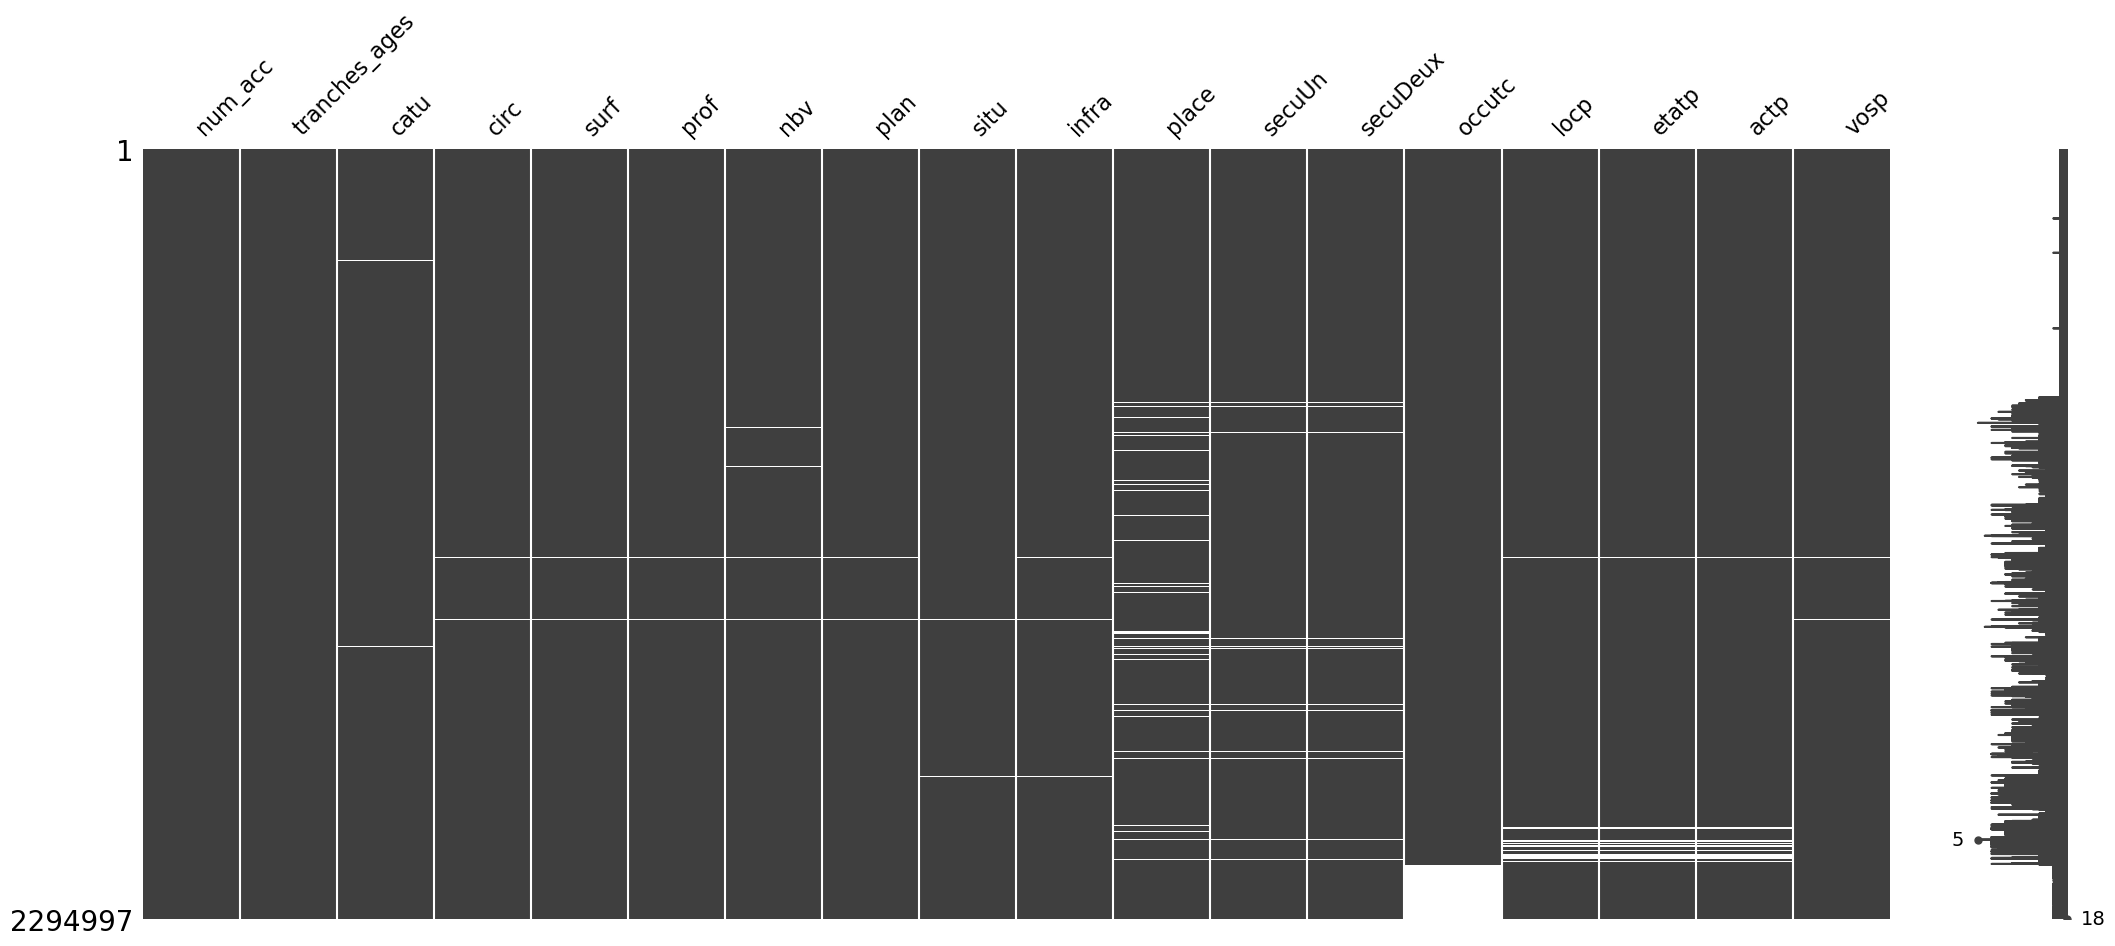

In [49]:
msno.matrix(usag_Lieux_Vehic_Carac[['num_acc', 'tranches_ages', 'catu', 'circ', 'surf', 'prof', 'nbv', 'plan',
                                'situ', 'infra', 'place', 'secuUn', 'secuDeux', 'occutc', 'locp', 'etatp', 'actp',
                                'vosp']]);

In [50]:
# pour les données manquante <= 5% : Remplacer les NAN par 'Non renseigné'

values = {
    'atm':'Non renseigné',#                    0.01 
    'int':'Non renseigné',#                    0.01 'non renseigné' + les -1
    'choc':'Non renseigné',#                   0.01 'non renseigné'
    'senc':'Non renseigné',#                   0.01 'non renseigné'
    'manv':'Non renseigné',#                   0.02 'non renseigné'
    'trajet':'Non renseigné',#                 0.02 'non renseigné'
    'obsm':'Non renseigné',#                   0.04 'non renseigné'
    'obs':'Non renseigné',#                    0.05 'non renseigné'
    'locp':'Non renseigné',#                   2.57(Localisation du piéton)
    'etatp':'Non renseigné',#                   2.57(précise si le piéton accidenté était seul ou non)
    'actp':'Non renseigné',#                   2.57 (Action du piéton)
}
usag_Lieux_Vehic_Carac.fillna(value=values, inplace=True)

In [51]:
# Count the number of missing values in each column
size = usag_Lieux_Vehic_Carac.shape

nan_values = usag_Lieux_Vehic_Carac.isna().sum()

nan_values = nan_values.sort_values(ascending=True)*100/size[0]

nan_values.round(2)

num_acc               0.00
date                  0.00
dep                   0.00
atm                   0.00
int                   0.00
agg                   0.00
manv                  0.00
choc                  0.00
obsm                  0.00
obs                   0.00
senc                  0.00
jour_de_la_semaine    0.00
catr                  0.00
heure                 0.00
etatp                 0.00
grav                  0.00
sexe                  0.00
trajet                0.00
locp                  0.00
actp                  0.00
num_veh               0.00
age_acc_an            0.00
an_nais               0.00
catv_Label            0.00
com                   0.00
lum                   0.00
col                   0.00
tranches_ages         0.14
catu                  0.15
circ                  0.15
surf                  0.19
prof                  0.19
plan                  0.23
nbv                   0.27
vosp                  0.28
situ                  0.50
infra                 0.55
s

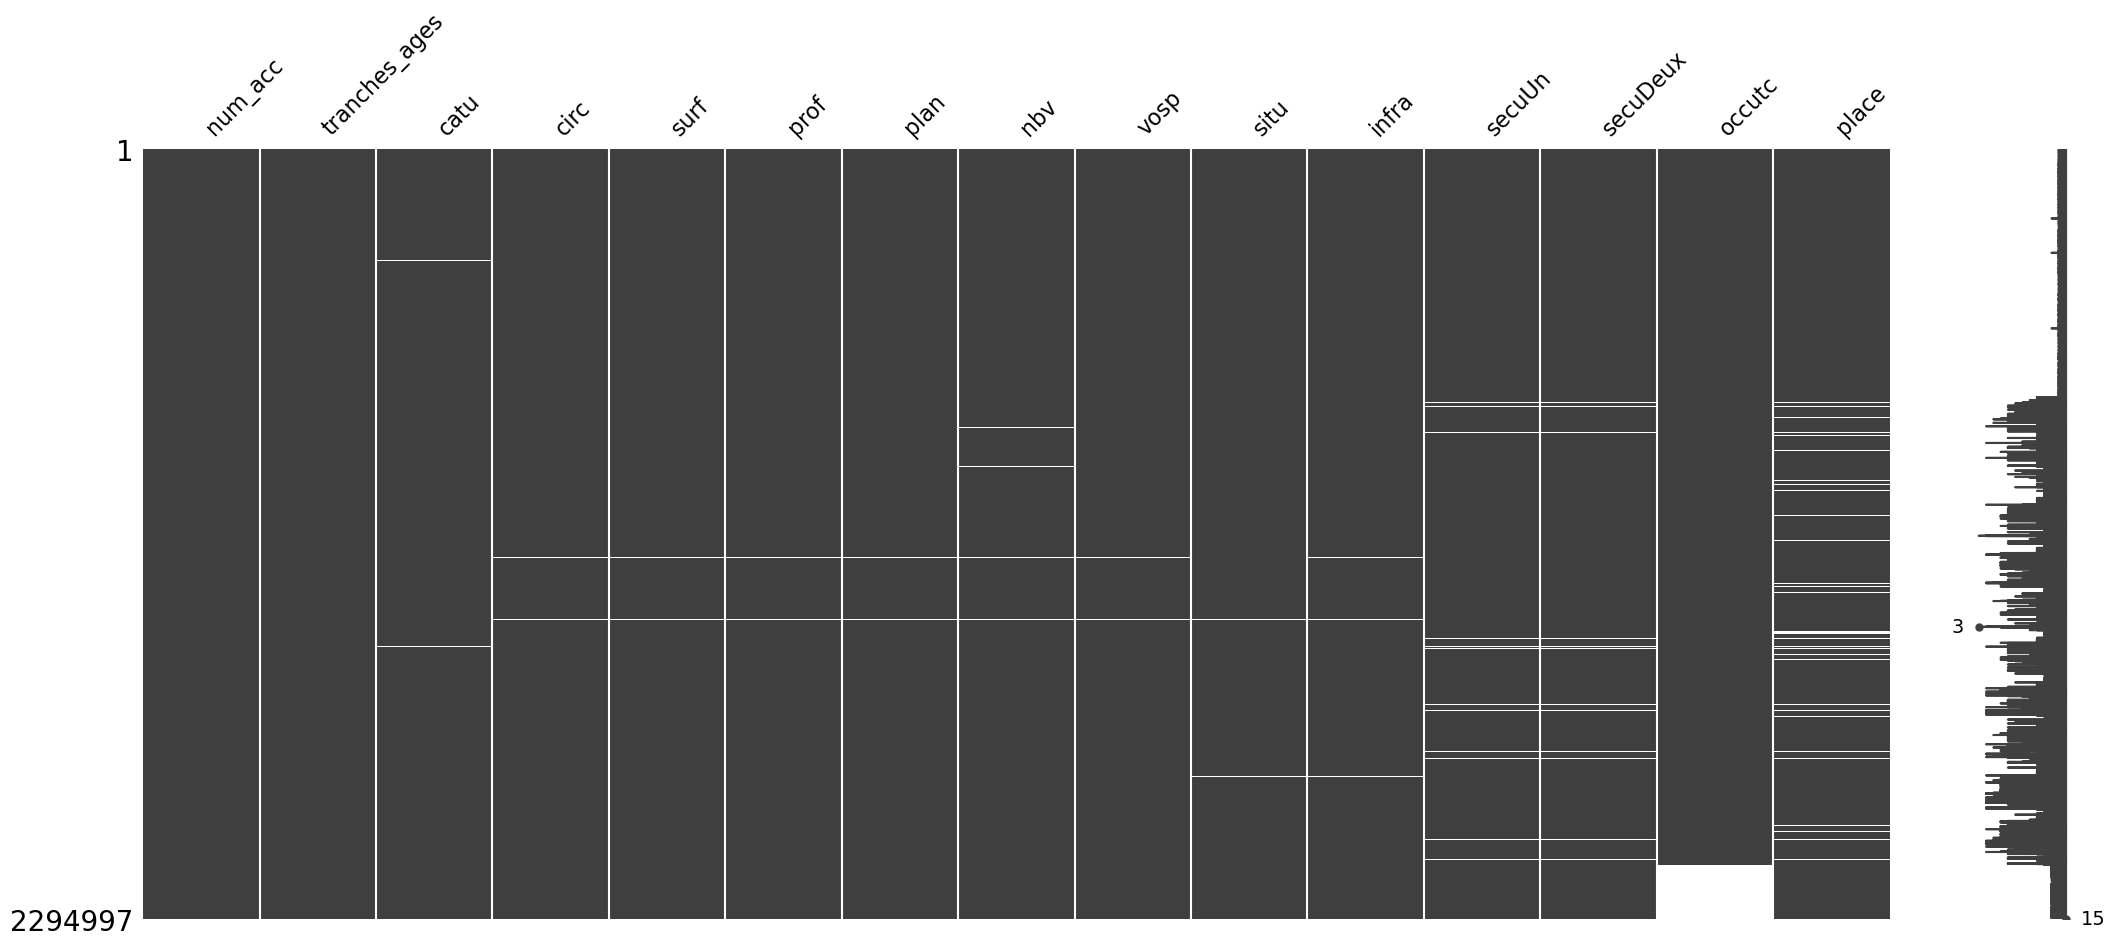

In [52]:
msno.matrix(usag_Lieux_Vehic_Carac[['num_acc', 'tranches_ages', 'catu', 'circ', 'surf', 'prof', 'plan', 'nbv',
                                'vosp', 'situ', 'infra', 'secuUn', 'secuDeux', 'occutc', 'place']]);

In [53]:
# Suppression des observations pour lesquelles la tranche d'âge n'est-elle pas renseignée car 
# cela suppose que l'année de naissance n'était pas renseignée
usag_Lieux_Vehic_Carac.dropna(subset=['tranches_ages'], inplace=True)

La variable Place permet de situer la place occupée dans le véhicule par l'usager au moment de l'accident. Et dépends du type de véhicule. ==> **Proposition** : Remplacer par la valeur la plus fréquente

Les variables 'secuUn' et 'secuDeux' relatifs à la présence et l’utilisation de l’équipement de sécurité. ==> **Proposition** : Remplacer la valeur la plus fréquente

Ces 3 variables c et 'place' semblent former un autre groupe, relatif à la sécurité des usagers.

In [54]:
for col in ['catu', 'circ', 'surf', 'prof', 'plan', 'nbv', 'vosp', 'situ', 'infra', 'secuUn', 'secuDeux', 'occutc', 'place']:
    usag_Lieux_Vehic_Carac[col].fillna(usag_Lieux_Vehic_Carac[col].mode()[0], inplace=True)

In [55]:
# Count the number of missing values in each column
size = usag_Lieux_Vehic_Carac.shape

nan_values = usag_Lieux_Vehic_Carac.isna().sum()

nan_values = nan_values.sort_values(ascending=True)*100/size[0]

nan_values.round(2)
 

num_acc               0.0
jour_de_la_semaine    0.0
surf                  0.0
infra                 0.0
situ                  0.0
senc                  0.0
occutc                0.0
obs                   0.0
obsm                  0.0
choc                  0.0
manv                  0.0
agg                   0.0
int                   0.0
atm                   0.0
dep                   0.0
date                  0.0
prof                  0.0
vosp                  0.0
plan                  0.0
circ                  0.0
place                 0.0
catu                  0.0
grav                  0.0
sexe                  0.0
trajet                0.0
nbv                   0.0
actp                  0.0
locp                  0.0
an_nais               0.0
num_veh               0.0
secuUn                0.0
secuDeux              0.0
age_acc_an            0.0
tranches_ages         0.0
catr                  0.0
etatp                 0.0
heure                 0.0
catv_Label            0.0
lum         

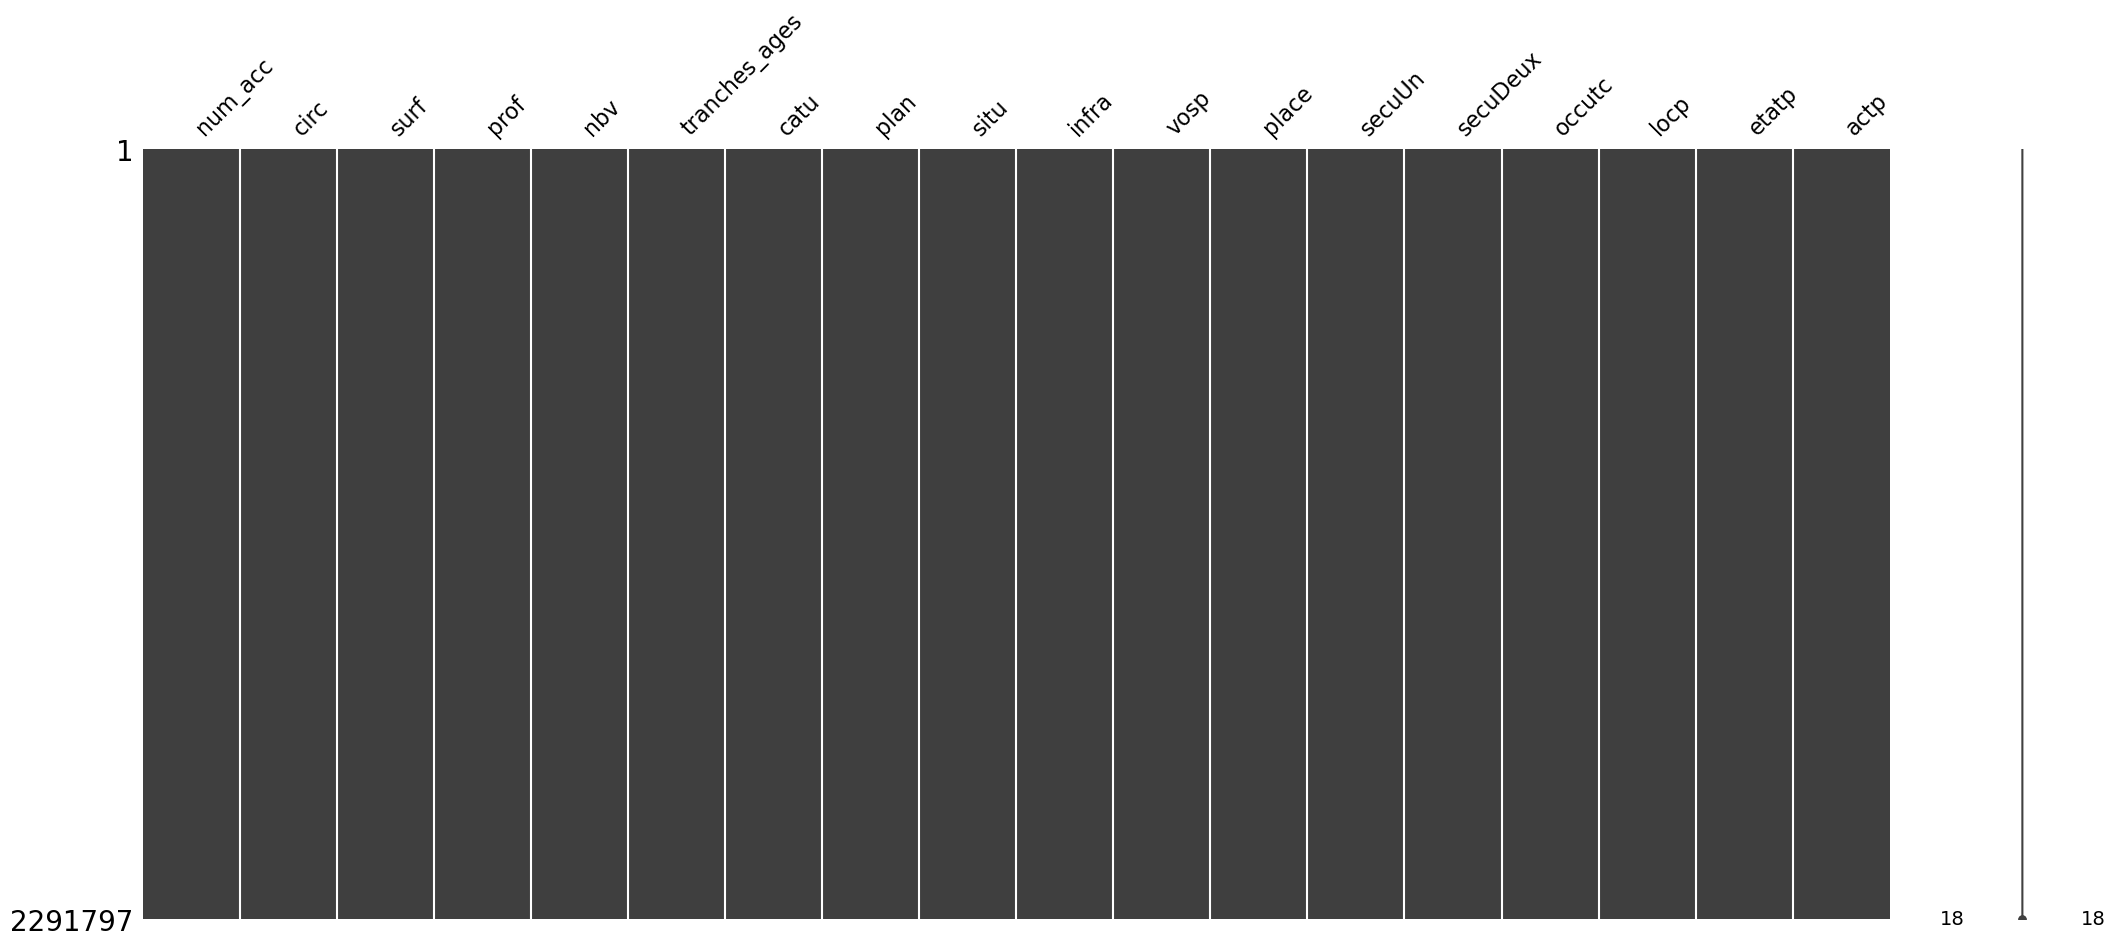

In [56]:
msno.matrix(usag_Lieux_Vehic_Carac[['num_acc', 'circ', 'surf', 'prof', 'nbv', 'tranches_ages', 'catu', 
                                    'plan', 'situ', 'infra', 'vosp', 'place', 'secuUn', 'secuDeux', 
                                    'occutc', 'locp', 'etatp', 'actp']]);

In [57]:
### Nombre de valeurs uniques
for colname in usag_Lieux_Vehic_Carac.columns:
  print(f"Nombre de valeurs uniques dans la colonne {colname}: ", usag_Lieux_Vehic_Carac[colname].nunique())

Nombre de valeurs uniques dans la colonne num_acc:  1030809
Nombre de valeurs uniques dans la colonne place:  11
Nombre de valeurs uniques dans la colonne catu:  3
Nombre de valeurs uniques dans la colonne grav:  4
Nombre de valeurs uniques dans la colonne sexe:  2
Nombre de valeurs uniques dans la colonne trajet:  7
Nombre de valeurs uniques dans la colonne locp:  11
Nombre de valeurs uniques dans la colonne actp:  11
Nombre de valeurs uniques dans la colonne etatp:  4
Nombre de valeurs uniques dans la colonne an_nais:  106
Nombre de valeurs uniques dans la colonne num_veh:  161
Nombre de valeurs uniques dans la colonne secuUn:  11
Nombre de valeurs uniques dans la colonne secuDeux:  11
Nombre de valeurs uniques dans la colonne age_acc_an:  158
Nombre de valeurs uniques dans la colonne tranches_ages:  6
Nombre de valeurs uniques dans la colonne catr:  8
Nombre de valeurs uniques dans la colonne circ:  5
Nombre de valeurs uniques dans la colonne nbv:  54
Nombre de valeurs uniques dans 

In [58]:
# Dépendances statistiques entre les variables explicatives et entre les variables explicatives et la variable cible
# Affichage du tableau des corrélations entre chaque paire de variables du DataFrame usag_Lieux_Vehic_Carac

usag_Lieux_Vehic_Carac.corr()

,num_acc,age_acc_an,nbv,occutc,heure
num_acc,1.000000,0.047243,0.047279,0.005042,-0.007378
age_acc_an,0.047243,1.000000,-0.006715,0.002883,-0.011463
nbv,0.047279,-0.006715,1.000000,0.006566,-0.020850
occutc,0.005042,0.002883,0.006566,1.000000,-0.011731
heure,-0.007378,-0.011463,-0.020850,-0.011731,1.000000


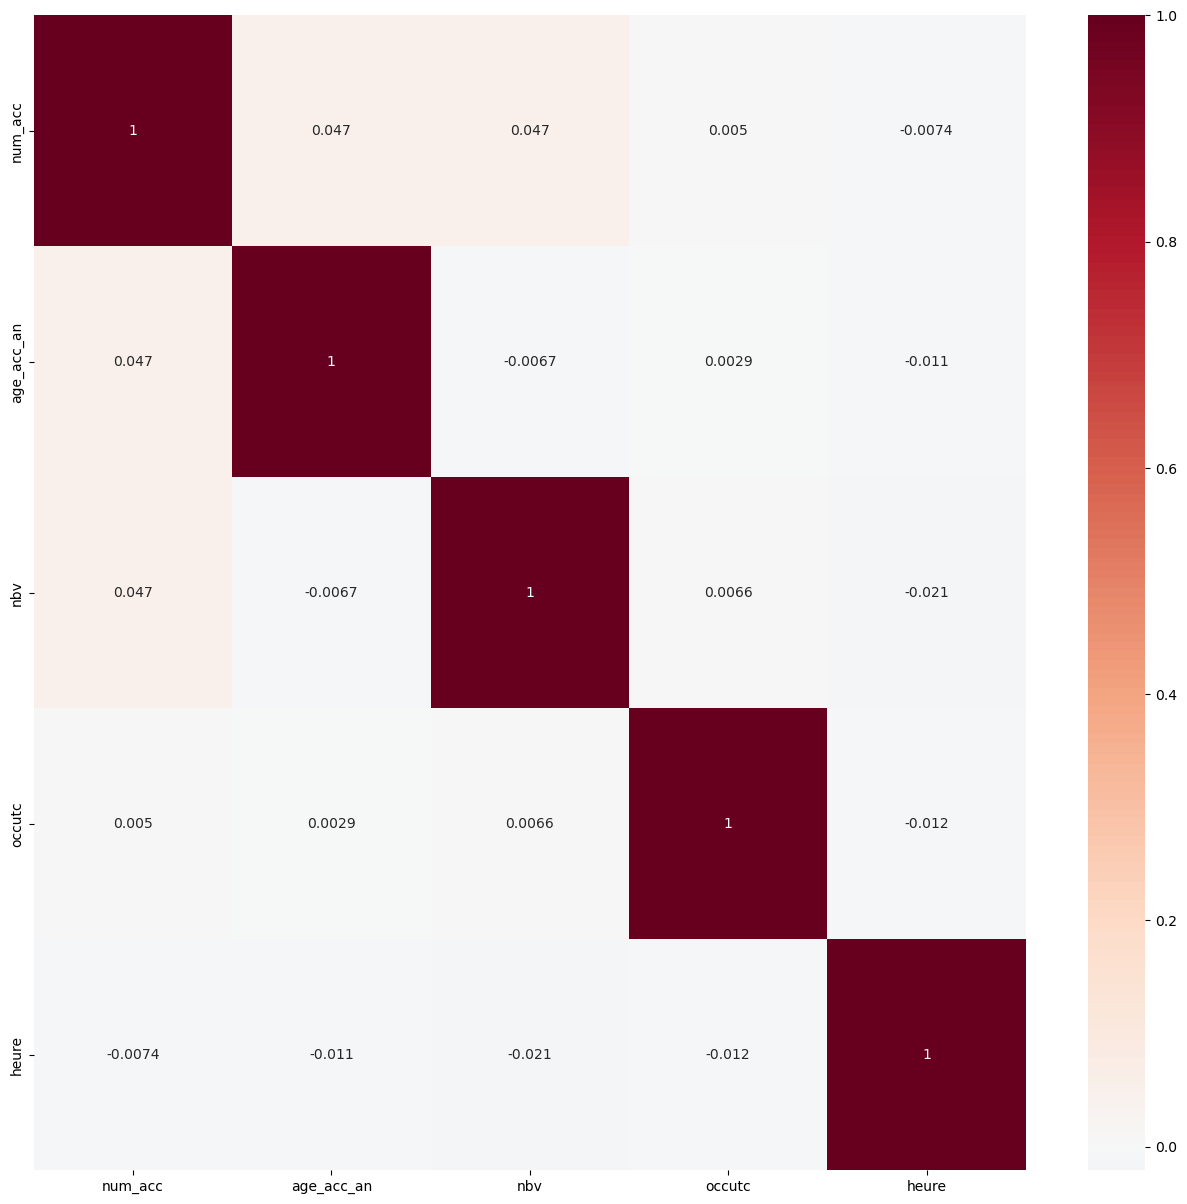

In [59]:
# Une heatmap de corrélations entre toutes les variables du DataFrame permet de repérer les variables importantes
# et celles colinéaires entre elles.

correlation_matrix = usag_Lieux_Vehic_Carac.corr()
plt.figure(figsize=(16, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='RdBu_r', center=0)
plt.show()

In [60]:
### Export DataFrame to csv
usag_Lieux_Vehic_Carac.to_csv("fusion3.csv")

In [61]:
usag_Lieux_Vehic_Carac.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2291797 entries, 0 to 2297705
Data columns (total 41 columns):
 #   Column              Dtype         
---  ------              -----         
 0   num_acc             int64         
 1   place               category      
 2   catu                category      
 3   grav                category      
 4   sexe                category      
 5   trajet              category      
 6   locp                category      
 7   actp                category      
 8   etatp               category      
 9   an_nais             datetime64[ns]
 10  num_veh             object        
 11  secuUn              category      
 12  secuDeux            category      
 13  age_acc_an          float64       
 14  tranches_ages       category      
 15  catr                category      
 16  circ                category      
 17  nbv                 float64       
 18  vosp                object        
 19  prof                category      
 20  pl

In [62]:
usag_Lieux_Vehic_Carac.dtypes

num_acc                        int64
place                       category
catu                        category
grav                        category
sexe                        category
trajet                      category
locp                        category
actp                        category
etatp                       category
an_nais               datetime64[ns]
num_veh                       object
secuUn                      category
secuDeux                    category
age_acc_an                   float64
tranches_ages               category
catr                        category
circ                        category
nbv                          float64
vosp                          object
prof                        category
plan                        category
surf                        category
infra                         object
situ                        category
senc                        category
occutc                       float64
obs                         category
o